# DAV 6150 Module 4 Assignment: Feature Selection & Dimensionality Reduction

## Introduction 
For this assignment the primary task is to apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear regression model that predicts the number of times an online news article is shared.

The data set you will be using is sourced from the UC Irvine machine learning archive, it is comprised of 39,797 observations and 61 attributes. The shares variable will serve as the response variable for your regression model. As such, we will apply the feature selection / dimensionality reduction expertise to the remaining 60 attributes for purposes of identifying the explanatory variables that you believe will be most useful when included in a linear regression model that estimates shares.

## Exploratory Data Analysis

In [16]:
# import pandas
import pandas as pd

# read the data set from Github repository and load it into a Pandas dataframe
filename = "https://raw.githubusercontent.com/nananov/DAV-6150/master/M4_Data.csv"
df = pd.read_csv(filename, skipinitialspace=True) #remove space in the title line
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Look into some potetial dependent variables before applying further steps. 

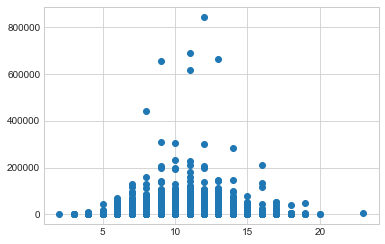

In [19]:
# draw dot plots to see linear relationship between response variable and explanatory variables separately
import matplotlib.pyplot as plt

# number of words in the title vs. number of shares
plt.scatter(df['n_tokens_title'], df['shares'], marker='o')

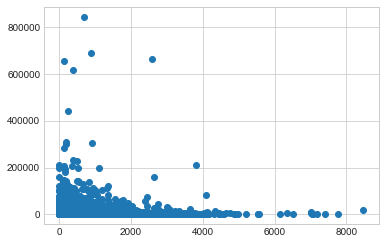

In [20]:
# number of words in the content vs. number of shares
plt.scatter(df['n_tokens_content'], df['shares'], marker='o')

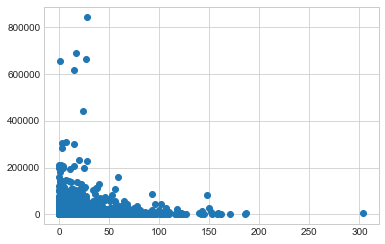

In [22]:
# number of links vs. number of shares
plt.scatter(df['num_hrefs'], df['shares'], marker='o')

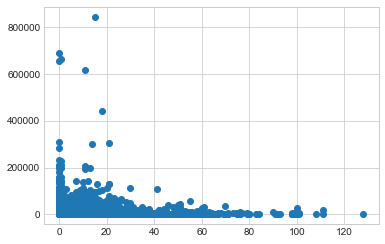

In [23]:
# number of images vs. number of shares
plt.scatter(df['num_imgs'], df['shares'], marker='o')

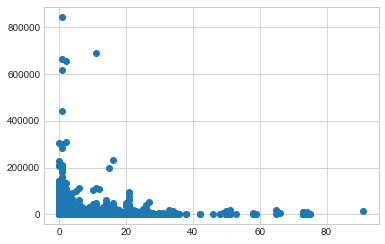

In [25]:
# number of videos. vs. number of shares
plt.scatter(df['num_videos'], df['shares'], marker='o')

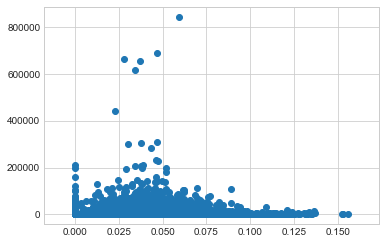

In [27]:
# rate of positive words in the content vs. number of shares
plt.scatter(df['global_rate_positive_words'], df['shares'], marker='o')

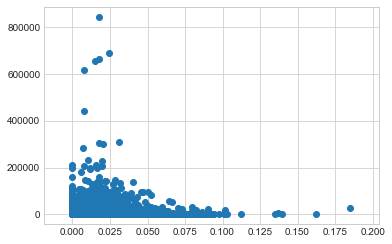

In [28]:
# rate of negative words in the content vs. number of shares
plt.scatter(df['global_rate_negative_words'], df['shares'], marker='o')

These attributes: n_tokens_content, num_hrefs, num_imgs, num_videos, global_rate_negative_words, seem to have a negative linear relationship with the response variable, shares. 

## Feature Selection / Dimensionality Reduction

In [31]:
# what is the dimensionality of the data?
df1 = df.to_numpy()  # convert dataframe to numpy array
df1.data.shape

(39644, 61)

In [ ]:
# assign the explanatory variables to a Python object
X = df1.data

# assign the response variable to a Python object
y = df['shares'].astype(int)


# load PCA + SVM classifier ("SVC") + cross validation functions
import numpy as np
from sklearn import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

# split the data into training + testing subsets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

# create an instance of a PCA model + set the number of components want to retain
pca = PCA(n_components=2)

# apply the PCA function to the training data
pca.fit(X_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

# display the singular values associated with the 2 principal components
print(pca.singular_values_)

# now apply the results of the PCA to the training data to transform it into 2 principal components per observation
X_t_train = pca.transform(X_train)

# apply the results of the PCA to the testing data to transform it into 2 principal components per observation
X_t_test = pca.transform(X_test)

# create an instance of an SVM classifier
clf = SVC()

# fit the SVM classifier to the transformed training data + the response data
clf.fit(X_t_train, y_train)

# check the accuracy of the SVM classifier using the transformed explanatory variables + the response variable
print ('score', clf.score(X_t_test, y_test) )

# if desired, generate predictions from the SVM classifier for the transformed testing data
print ('pred label', clf.predict(X_t_test) )

## Regression Model Evaluation

In [45]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing only the explanatory variables for the linear regression model
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split
X = df.copy()
X.drop('shares', axis=1, inplace=True)
y = df['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
newX1_train = X_train[['n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos', 'global_rate_negative_words']].copy()

# sanity check
newX1_train.head()

# assign the model function
model = LinearRegression()

# fit the model using 5-fold cross validation
scores = cross_val_score(model, newX1_train, y_train, cv=5)

# print out the R^2 metrics derived from the K-fold cross validation of the linear regression model
print (scores)

[0.00301959 0.00322284 0.00170125 0.00274909 0.00653438]


In [46]:
# calculate the average R^2 across all 5 folds
np.mean(scores)

0.003445431212104566

## Conclusions

In this dataset, the number of explanatory variables is relatively large with respect to the number of observations contained within a data set, and we need to know how to effectively reduce the number of explanatory variables required for the intended regression model. 

The final r-square number is 0.003, which is very small, so there is no sufficient evidence to say that the exploratory variables I used in the model have a linear relationship with the response, number of shares. 